<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   
Здравствуй, Денис, спасибо за такую оценку работы, благодарю!

</div>

# Проект: Статистический анализ данных

## Описание проекта.
Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
- без подписки
    - абонентская плата отсутствует;
    - стоимость одной минуты поездки — 8 рублей;
    - стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra
    - абонентская плата — 199 рублей в месяц;
    - стоимость одной минуты поездки — 6 рублей;
    - стоимость старта — бесплатно.

## Цели проекта и Гипотезы.

<br>**Цели.**
<br>Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
<br>
<br>**Гипотезы.**
<br>Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные <br>акции, но сначала нужно выяснить несколько важных моментов.
- Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.
- Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.
- Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.
- Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

## Описание данных.

**Пользователи — `users_go.csv`**

- `user_id`	— уникальный идентификатор пользователя
- `name` — имя пользователя
- `age` —	возраст
- `city` — город
- `subscription_type` — тип подписки (free, ultra)

**Поeздки — `rides_go.csv`**

- `user_id`	— уникальный идентификатор пользователя
- `distance` — расстояние, которое пользователь проехал в текущей сессии (в метрах)
- `duration` — продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- `date` — дата совершения поездки

**Подписки — `subscriptions_go.csv`**

- `subscription_type` — тип подписки
- `minute_price` — стоимость одной минуты поездки по данной подписке
- `start_ride_price` — стоимость начала поездки
- `subscription_fee` — стоимость ежемесячного платежа

## Основные шаги проекта.

    - Шаг 1. Загрузка данных;
    - Шаг 2. Предобработка данны;
    - Шаг 3. Исследовательский анализ данных;
    - Шаг 4. Объединение данных;
    - Шаг 5. Подсчёт выручки;
    - Шаг 6. Проверка гипотез;
    - Шаг 7 (необязательное задание). Распределения;
    - Шаг 8. Общий вывод.

## Реализация проекта.

### ШАГ 0. Загрузка и настройка библиотек.

#### Загрузка библиотек.

In [ ]:
# Датасеты..
import pandas as pd

# визуализация данных
import plotly.express as px

# Математика
import numpy as np
from scipy import stats as st

# Графики
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import rcParams, rcParamsDefault
import seaborn as sns

<div class="alert alert-success">
<b>Комментарий Мой ☀️
   
Отлично!!!!!
Шалом Шалом!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Шалом Шалом!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Шалом Шалом!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Шалом Шалом!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
</div>

#### Дополнительные настройки.

In [69]:
# Настройки отображения
pd.options.display.float_format = '{:,.2f}'.format
pd.options.mode.chained_assignment = None
sns.set_style('darkgrid')

# Отображение колонок.
pd.options.display.max_columns = 20

# Для нормального отображения графиков plt
rcParams['figure.figsize'] = 10, 6
%config InlineBackend.figure_format = 'svg'

# Копирование значений, а не ссылок, через b = copy.deepcopy(a)
import copy

# Отображение всех колонок при выводе на печать
pd.set_option('display.max_columns', None)

### Шаг 1. Загрузка данных.

#### Загрузка данных. Таблица с пользователями  "users_go".

In [70]:
# Загружаем данные.
try:
    users_go = pd.read_csv('/datasets/users_go.csv')
except:
    users_go = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')

In [71]:
# Изучение датафрейма 'users_go' 
users_go.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 412.6 KB


In [72]:
# Выводим описательную статистику
users_go.describe()

,user_id,age
count,"1,565.00","1,565.00"
mean,762.63,24.92
std,443.26,4.55
min,1.00,12.00
25%,378.00,22.00
50%,762.00,25.00
75%,"1,146.00",28.00
max,"1,534.00",43.00


In [73]:
# Посмотрим таблицу
users_go.sample(10, random_state=0)

,user_id,name,age,city,subscription_type
319,320,Оксана,30,Екатеринбург,ultra
1405,1406,Вероника,28,Ростов-на-Дону,free
644,645,Олеся,36,Краснодар,ultra
579,580,Вероника,31,Пятигорск,ultra
414,415,Юлиана,24,Пятигорск,ultra
494,495,Святогор,24,Омск,ultra
618,619,Кристина,29,Екатеринбург,ultra
1479,1480,Кира,25,Краснодар,free
1263,1264,Каролина,21,Пятигорск,free
530,531,Елисей,22,Сочи,ultra


array([[<AxesSubplot:title={'center':'user_id'}>,
        <AxesSubplot:title={'center':'age'}>]], dtype=object)

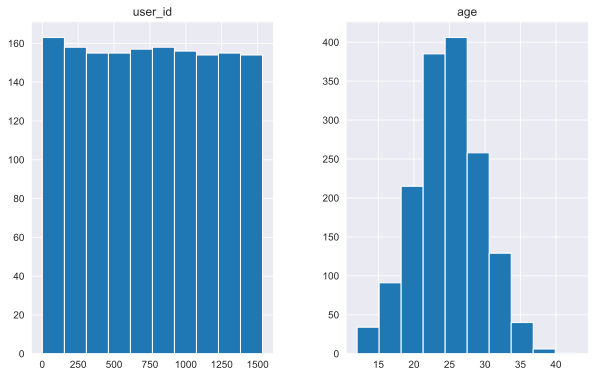

In [74]:
# Посмотрим в разрезе гистограмм.
users_go.hist()

##### Столбец 'user_id'

In [75]:
# Уникальные идентификаторы
print(len(users_go['user_id'].unique()), 'уникальных значений из', users_go['user_id'].count(), 'строк')
print('От', users_go['user_id'].min(), 'до', users_go['user_id'].max())

1534 уникальных значений из 1565 строк
От 1 до 1534


1534 уникальных значений из 1565 строк.
<br>От 1 до 1534
<br>В ‘user_id’ обнаружены дубликаты идентификаторов. 
<br>Имеющиеся значения позволяют использовать для этого столбца тип данных ‘uint16’.